# Introduction to Neural Networks for Regressions
1. Exploratory data analysis
2. Data preprocessing
3. Modeling
4. Evaluating / deploying

# Data Background

The [data](http://lib.stat.cmu.edu/datasets/boston) was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. 

The attributes are deﬁned as follows:

```
  CRIM: per capita crime rate by town.
  ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
  INDUS: proportion of non-retail business acres per town
  CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
  NOX: nitric oxides concentration (parts per 10 million)
  RM: average number of rooms per dwelling
  AGE: proportion of owner-occupied units built prior to 1940
  DIS: weighted distances to ﬁve Boston employment centers
  RAD: index of accessibility to radial highways
  TAX: full-value property-tax rate per $10,000
  PTRATIO: pupil-teacher ratio by town 12. 
  B: 1000(Bk−0.63)^2 where Bk is the proportion of blacks by town 13. 
  LSTAT: % lower status of the population
  MEDV: Median value of owner-occupied homes in $1000s
```

In [41]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/weibb123/DLWorkshop/main/boston.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [42]:
print(df.shape)

(506, 14)


# Simple EDA

We will tranform our data using standardization: $ z = \frac{x-\mu}{\sigma} $

In [43]:
# standardization

df_plot = df.copy()
mean = df_plot.mean(axis=0) # 0=sum up all the row, 1=col
std = df_plot.std(axis=0)

df_plot = df_plot - mean 
df_plot = df_plot/std
df_plot.head() # standardized

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.419367,0.284548,-1.286636,-0.272329,-0.144075,0.413263,-0.119895,0.140075,-0.981871,-0.665949,-1.457558,0.440616,-1.074499,0.159528
1,-0.416927,-0.487240,-0.592794,-0.272329,-0.739530,0.194082,0.366803,0.556609,-0.867024,-0.986353,-0.302794,0.440616,-0.491953,-0.101424
2,-0.416929,-0.487240,-0.592794,-0.272329,-0.739530,1.281446,-0.265549,0.556609,-0.867024,-0.986353,-0.302794,0.396035,-1.207532,1.322937
3,-0.416338,-0.487240,-1.305586,-0.272329,-0.834458,1.015298,-0.809088,1.076671,-0.752178,-1.105022,0.112920,0.415751,-1.360171,1.181589
4,-0.412074,-0.487240,-1.305586,-0.272329,-0.834458,1.227362,-0.510674,1.076671,-0.752178,-1.105022,0.112920,0.440616,-1.025487,1.486032


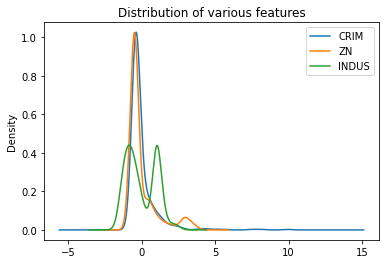

In [44]:
import matplotlib.pyplot as plt

# visualize distribution of some features
plt.title("Distribution of various features")
df_plot['CRIM'].plot(kind='kde')
df_plot['ZN'].plot(kind='kde')
df_plot['INDUS'].plot(kind='kde')

plt.legend()
plt.show()

## Data Preprocessing

Feature selections, feature engineering, etc.

In [45]:
# check for NaN values
# examine and replace missing values 

print(df.isnull().values.any())

False


In [46]:
# Split dataset to obtain input features X and output y
X = df.drop(['MEDV'], axis=1)  
y = df['MEDV']

In [47]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
# standardize training data 
mean = X.mean()
std = X.std()

x_train = x_train - mean
x_train = x_train/std

# standardize validation data
x_val = x_val - mean
x_val = x_val/std

# NOTE: you don't have to standardize y, for interpretability reasons

## Building our Neural Network

In [49]:
from tensorflow import keras
from tensorflow.keras import layers

def build_model():
  # Here we have sequentially: 1 input layer | 1 hidden layer | and 1 output layer
  model = keras.Sequential([
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1) # 1 because we want to return a single value with no transformations (no relu)
  ])

# initialize optimizer, loss, metrics
  model.compile(optimizer='adam',
                loss='mse',
                metrics=['mae'] # using mean absolute error
                )
  
  return model

In [50]:
model = build_model()

history = model.fit(x_train, y_train, epochs=100, batch_size=16, validation_data=(x_val, y_val))

Epoch 1/100
26/26 [==============================] - 1s 19ms/step - loss: 546.7239 - mae: 21.5262 - val_loss: 426.8372 - val_mae: 18.9921
Epoch 2/100
26/26 [==============================] - 0s 6ms/step - loss: 411.5181 - mae: 18.2784 - val_loss: 258.4039 - val_mae: 14.4074
Epoch 3/100
26/26 [==============================] - 0s 6ms/step - loss: 204.1581 - mae: 11.7814 - val_loss: 85.2038 - val_mae: 7.4532
Epoch 4/100
26/26 [==============================] - 0s 6ms/step - loss: 84.0810 - mae: 7.0257 - val_loss: 46.1850 - val_mae: 4.9939
Epoch 5/100
26/26 [==============================] - 0s 6ms/step - loss: 47.4194 - mae: 5.1899 - val_loss: 32.5409 - val_mae: 3.9751
Epoch 6/100
26/26 [==============================] - 0s 7ms/step - loss: 32.2936 - mae: 4.1683 - val_loss: 27.8785 - val_mae: 3.5465
Epoch 7/100
26/26 [==============================] - 0s 7ms/step - loss: 26.5550 - mae: 3.6900 - val_loss: 25.1113 - val_mae: 3.3388
Epoch 8/100
26/26 [==============================] - 0s 6m

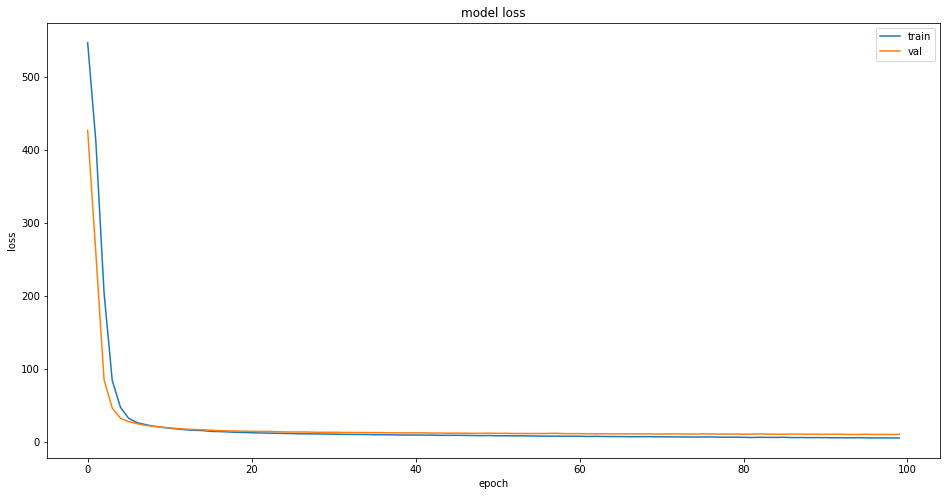

In [51]:
# Plotting our loss over time
plt.figure(figsize=(16, 8))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

## Model "deployment"

In [52]:
# predictions, we are predicting on validation dataset, but in the real world, your model will try to predict the test dataset
predictions = model.predict(x_val)

4/4 [==============================] - 0s 5ms/step


In [53]:
print(predictions[:5]) # first 5 predictions
print(y_val[:5]) # first 5 ground truth labels

[[26.305897]
 [33.5984  ]
 [16.327684]
 [24.703905]
 [15.968345]]
173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
Name: MEDV, dtype: float64


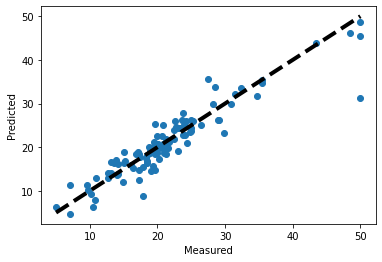

In [54]:
fig, ax = plt.subplots()
ax.scatter(y_val, predictions)
ax.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=4)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
plt.show()

Note: Since we trained the model on standardized data, standardizing testing data (using mean and std from the **training dataset**) can yield better results.